Submission Proyek Pertama : Membuat Model NLP dengan TensorFlow

Nama: Muhammad Iqbal Fadlillah

Domisili: Kota Bandung, Jawa Barat

Email: m011x0093@dicoding.org, muhammadmif23@gmail.com

In [103]:
# Import Library are required
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Language_Detection.csv to Language_Detection (2).csv


In [104]:
# Open dataset file 
df = pd.read_csv('Language_Detection.csv')

In [105]:
df.tail()

,Text,Language
2940,Ik weet dat het me zo spijt van de manier waar...,Dutch
2941,narcisa veranderde haar manier van doen ze wor...,Dutch
2942,hoe' Marian vertelde hun nu allebei alles wat ...,Dutch
2943,"heeft ze, denk ik dat ze nu geen goudbrood mee...",Dutch
2944,Terry je lijkt eigenlijk een beetje op die eng...,Dutch


In [106]:
# Edit The Data Frame
category = pd.get_dummies(df.Language)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Language')
df_baru

,Text,Dutch,English,French
0,"Nature, in the broadest sense, is the natural...",0,1,0
1,"""Nature"" can refer to the phenomena of the phy...",0,1,0
2,"The study of nature is a large, if not the onl...",0,1,0
3,"Although humans are part of nature, human acti...",0,1,0
4,[1] The word nature is borrowed from the Old F...,0,1,0
...,...,...,...,...
2940,Ik weet dat het me zo spijt van de manier waar...,1,0,0
2941,narcisa veranderde haar manier van doen ze wor...,1,0,0
2942,hoe' Marian vertelde hun nu allebei alles wat ...,1,0,0
2943,"heeft ze, denk ik dat ze nu geen goudbrood mee...",1,0,0


In [107]:
# Separate the atribute and labels
text = df_baru['Text'].values
label = df_baru[['Dutch', 'English', 'French']].values

In [108]:
# Split the data using train_test_split
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [109]:
# Tokenizer the data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)

padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [118]:
# Make CNN Layer
import tensorflow as tf
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=None),
      tf.keras.layers.LSTM(256, dropout=0.1, recurrent_dropout=0.3),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [111]:
# Make CallBack Function
class TestCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
            print("\nAkurasi telah mencapai >=90%!") 
            self.model.stop_training = True 
callbacks = TestCallback()

In [119]:
#Train Model 
model_train = model.fit(
            padded_latih, 
            label_latih, 
            epochs=25, 
            steps_per_epoch=30,
            validation_data=(padded_test, label_test), verbose=1, callbacks = [callbacks])

Epoch 1/25
30/30 [==============================] - 28s 859ms/step - loss: 1.0863 - accuracy: 0.4003 - val_loss: 1.0692 - val_accuracy: 0.4482
Epoch 2/25
30/30 [==============================] - 26s 854ms/step - loss: 1.0631 - accuracy: 0.4249 - val_loss: 1.0483 - val_accuracy: 0.4482
Epoch 3/25
30/30 [==============================] - 26s 856ms/step - loss: 1.0149 - accuracy: 0.4232 - val_loss: 0.7598 - val_accuracy: 0.4482
Epoch 4/25
30/30 [==============================] - 26s 853ms/step - loss: 0.7492 - accuracy: 0.4622 - val_loss: 0.6202 - val_accuracy: 0.7963
Epoch 5/25
30/30 [==============================] - 25s 849ms/step - loss: 0.6338 - accuracy: 0.7568 - val_loss: 0.5984 - val_accuracy: 0.7963
Epoch 6/25
30/30 [==============================] - 26s 852ms/step - loss: 0.6047 - accuracy: 0.7916 - val_loss: 0.5857 - val_accuracy: 0.7929
Epoch 7/25
30/30 [==============================] - 26s 874ms/step - loss: 0.5810 - accuracy: 0.8009 - val_loss: 0.5638 - val_accuracy: 0.7963

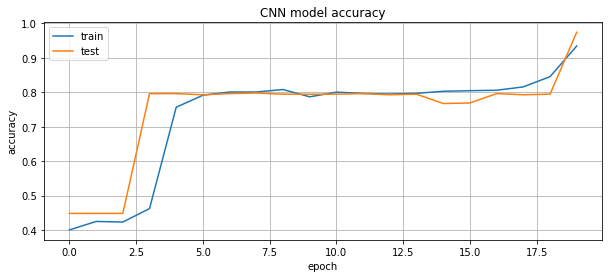

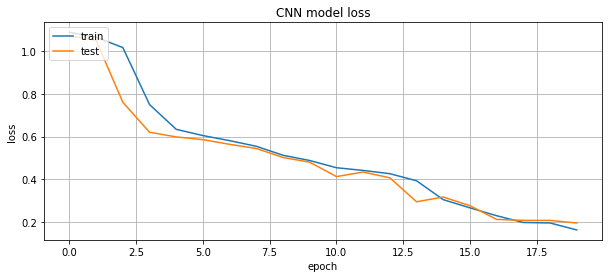

In [120]:
from matplotlib import pyplot as plt
# Creating accuracy plots for CNN models
plt.figure(figsize=(10,4))
plt.plot(model_train.history['accuracy'])
plt.plot(model_train.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()
print()

# Creating loss plots for CNN models
plt.figure(figsize=(10,4))
plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()